In [69]:
import pandas as pd
import seaborn as sns
import numpy as np

In [165]:
#Missing Value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Outlier Detection
from sklearn.ensemble import IsolationForest

#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

#%matplotlib inline

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression as LogReg

from sklearn.svm import SVR

#!pip install xgboost
#!pip install catboost
#!pip install lightgbm
#!pip install h2o

from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR

import h2o
from h2o.automl import H2OAutoML

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge

In [278]:
df = pd.read_csv(r"C:\Users\pabli\Desktop\technical_challenge_DA\data\measurements.csv")

In [7]:
!pip install openpyxl


  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [211]:
df2 = pd.read_excel(r"C:\Users\pabli\Desktop\technical_challenge_DA\data\measurements2.xlsx")

In [212]:
df1

,distance,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_ac,specials_ac rain,...,specials_half rain half sun,specials_others,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,refill gas_E10,refill gas_SP98,refill gas_notrefill
0,28.0,26,21.5,12,0,0,0,45.0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,12.0,30,21.5,13,0,0,0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,11.2,38,21.5,15,0,0,0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,12.9,36,21.5,14,0,0,0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,18.5,46,21.5,15,0,0,0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
384,16.1,38,25.0,31,1,0,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
385,16.0,45,25.0,19,0,0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
386,15.4,42,25.0,31,1,0,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [281]:
df['distance'] = df['distance'].str.replace(',','.').astype('float32')
df['consume'] = df['consume'].str.replace(',','.').astype('float32')
df['temp_inside'] = df['temp_inside'].str.replace(',','.').astype('float32')
df['refill liters'] = df['refill liters'].str.replace(',','.').astype('float32')
df['specials'] = df['specials'].str.lower()

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float32
 1   consume        388 non-null    float32
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float32
 11  refill gas     13 non-null     object 
dtypes: float32(4), int64(5), object(3)
memory usage: 30.4+ KB


In [216]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float32
 1   consume        388 non-null    float32
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float32
 11  refill gas     13 non-null     object 
dtypes: float32(4), int64(5), object(3)
memory usage: 30.4+ KB


In [218]:
def check_nan(data: pd.DataFrame) -> None:
    
    nan_cols=data.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(data.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show()

'N nan cols: 4'

temp_inside       3.092784
specials         76.030928
refill liters    96.649485
refill gas       96.649485
dtype: float64

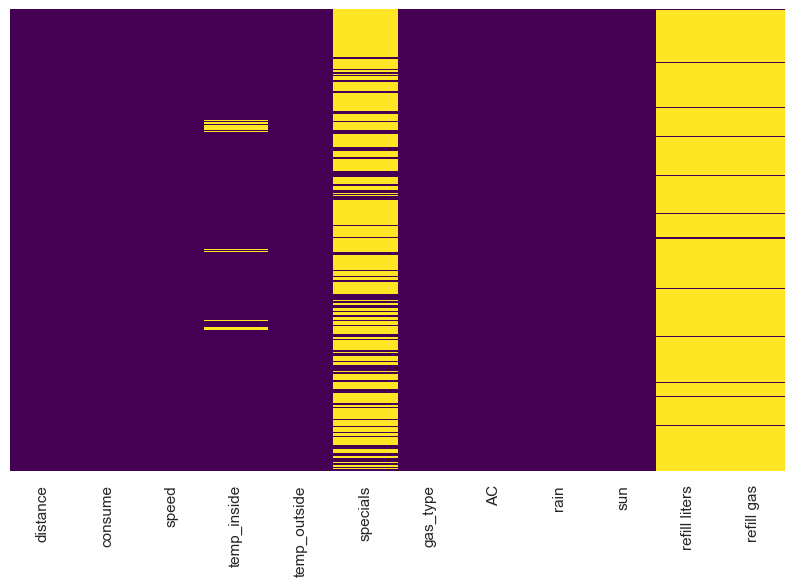

In [219]:
check_nan(df)

In [293]:
num_columns= df.select_dtypes(include=np.number)
num_columns.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,0,0,0,45.0
1,12.0,4.2,30,21.5,13,0,0,0,NaN
2,11.2,5.5,38,21.5,15,0,0,0,NaN
3,12.9,3.9,36,21.5,14,0,0,0,NaN
4,18.5,4.5,46,21.5,15,0,0,0,NaN


C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


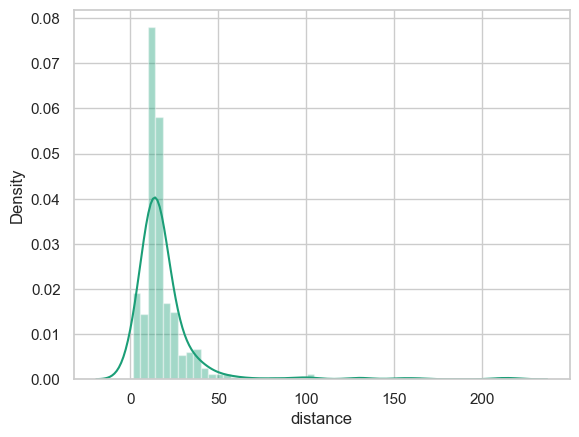

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


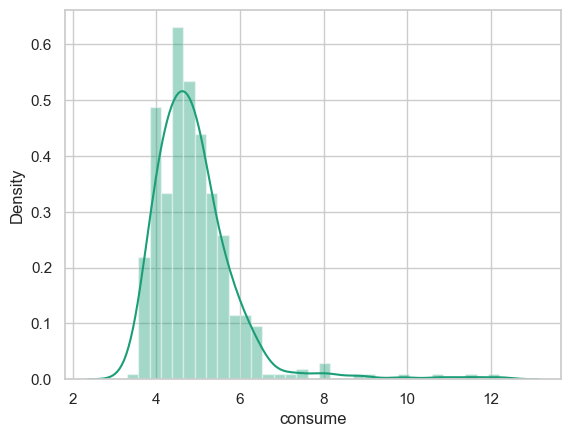

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


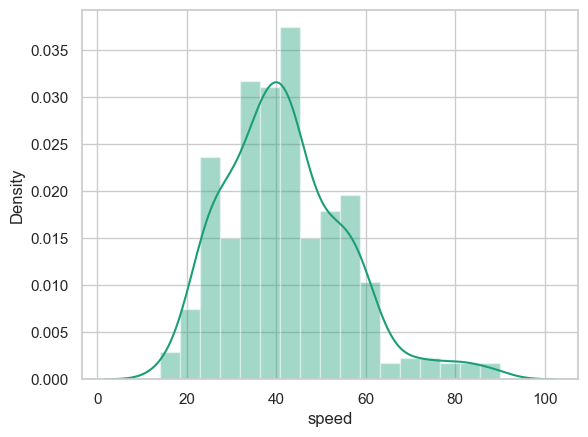

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


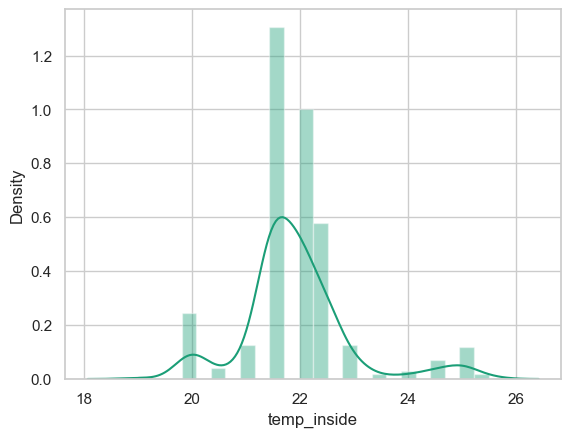

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


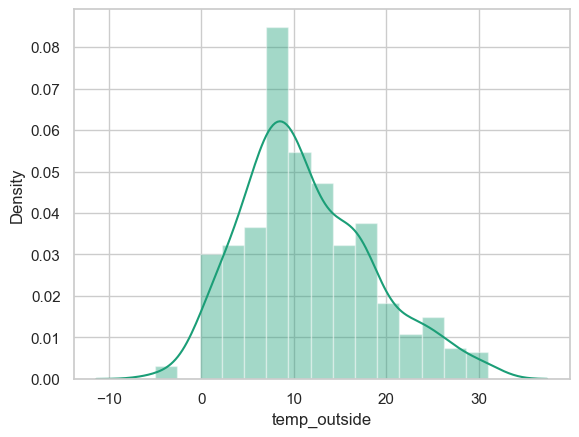

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


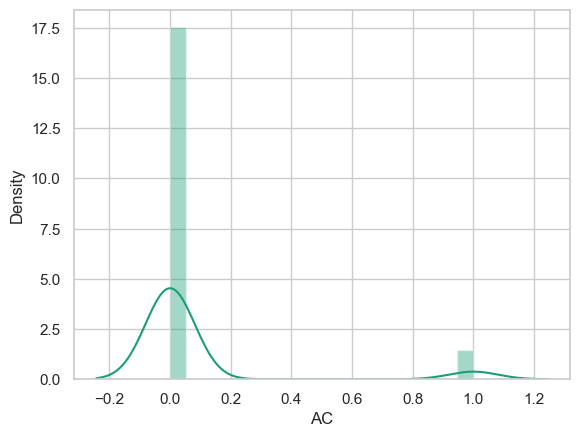

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


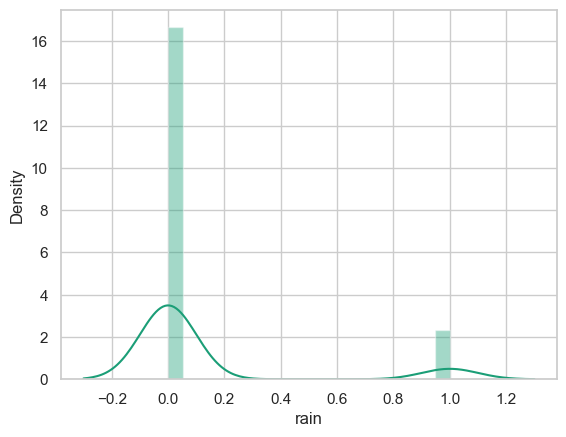

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


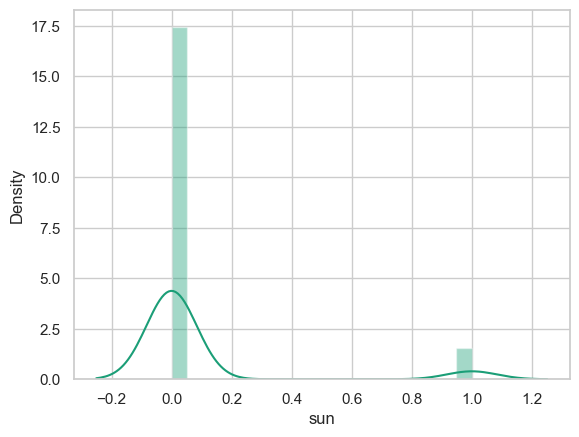

C:\Users\pabli\AppData\Local\Temp\ipykernel_8848\1217847666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])


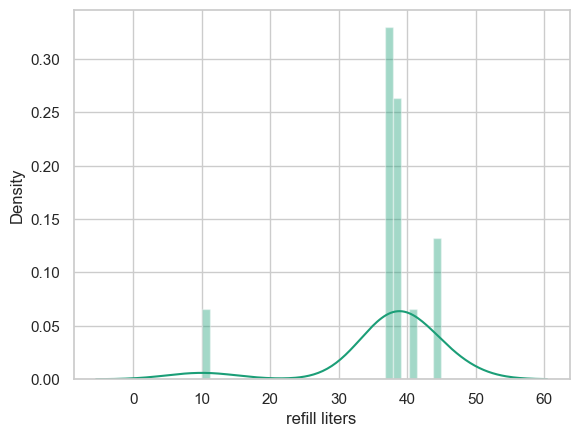

In [294]:
for column in num_columns.columns:
    sns.distplot(num_columns[column])
    plt.show();

In [220]:
# We now have to fill nan values

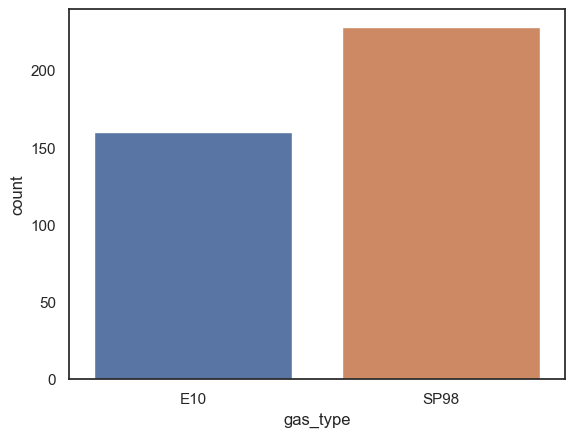

In [221]:
sns.countplot(data = df, x = "gas_type")
plt.show()

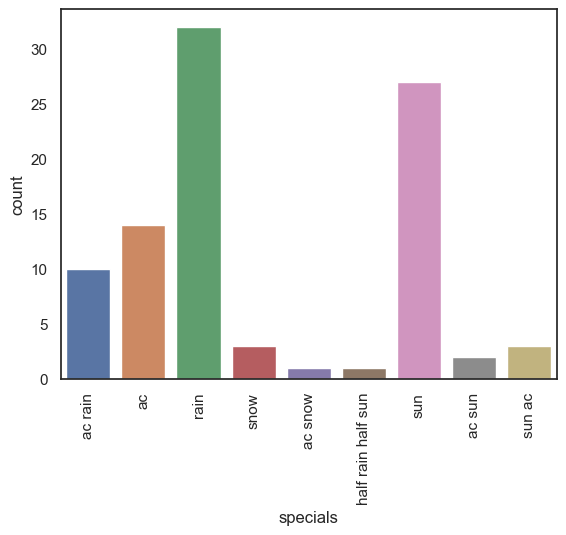

In [222]:
sns.countplot(data = df, x = "specials")
plt.xticks(rotation=90)
plt.show()

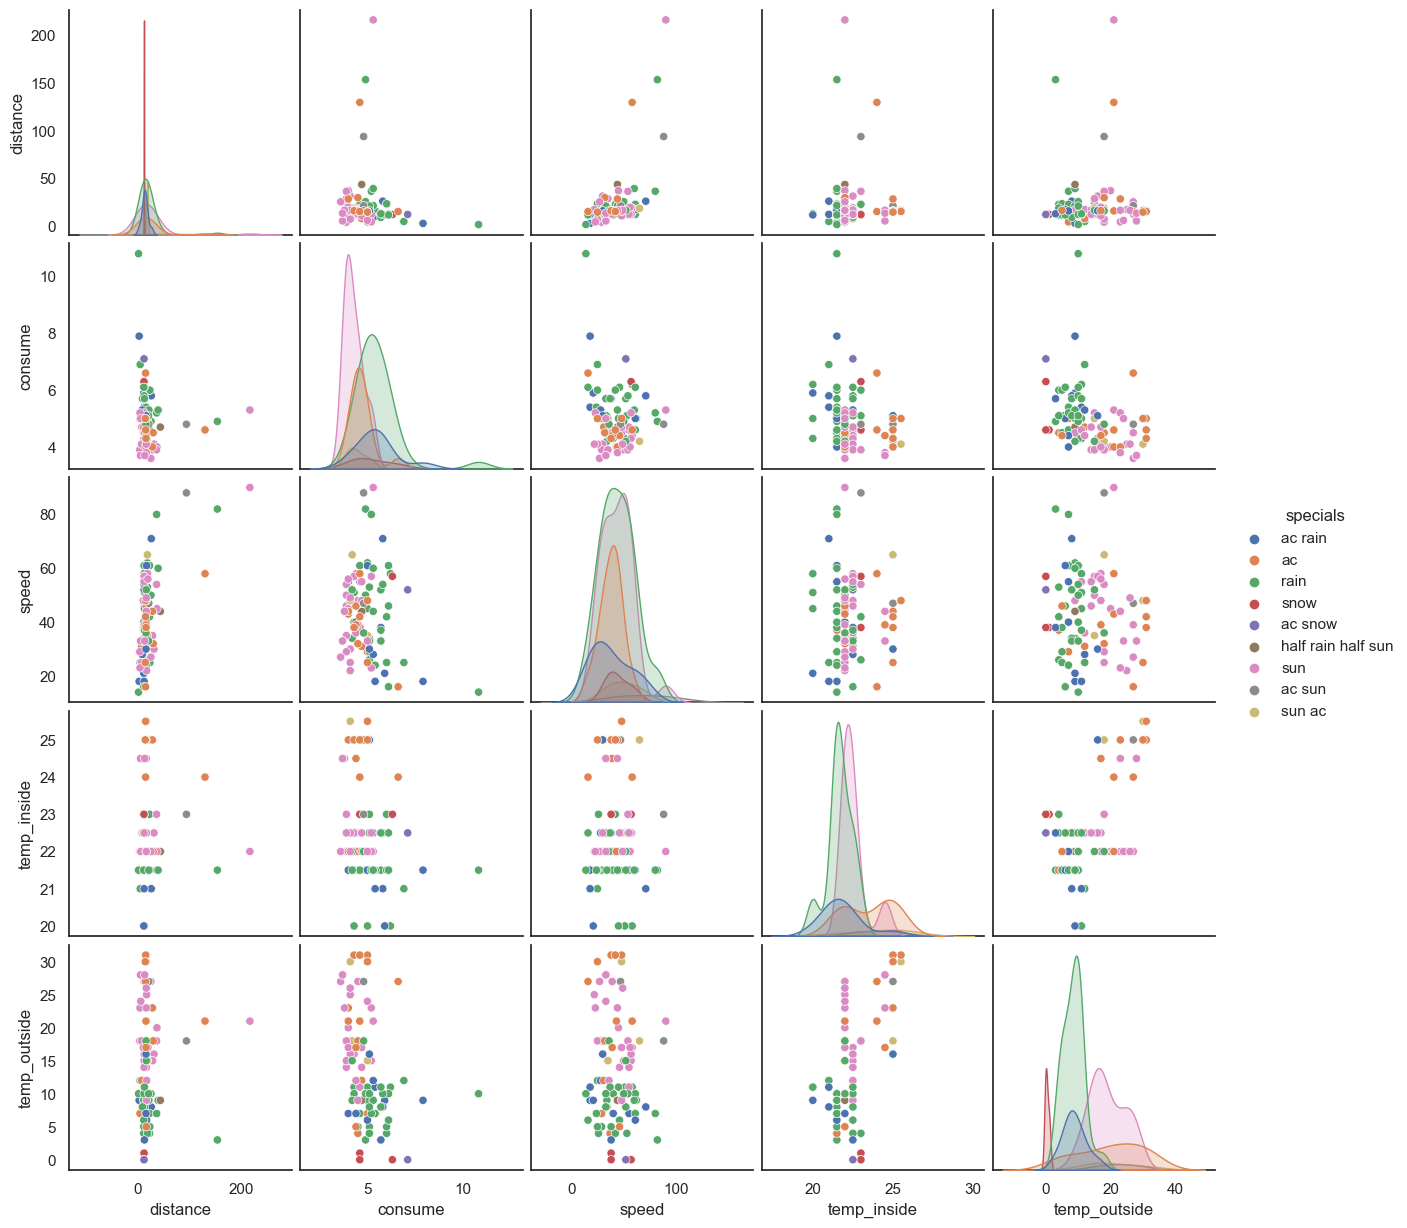

In [223]:
sns.pairplot(data = df[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials"]], hue="specials")
plt.show()

In [224]:
# We have to take care of missing values when possible, if not delete unusable columns

In [225]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [226]:
#temp_inside: imputer because low number of nulls
#specials: replace nan to other
#refill liters replace to 0 because no refill liters information
#refill gas replace to notrefill because didnt refill 

In [227]:
impute = IterativeImputer()

In [228]:
df['temp_inside'] = impute.fit_transform(df['temp_inside'].values.reshape(-1,1)).reshape(-1)

In [229]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [230]:
df['specials'] = df['specials'].fillna('others')

In [231]:
df['refill liters'] = df['refill liters'].fillna(0)

In [232]:
df['refill gas'] = df['refill gas'].fillna('notrefill')

'N nan cols: 0'

Series([], dtype: float64)

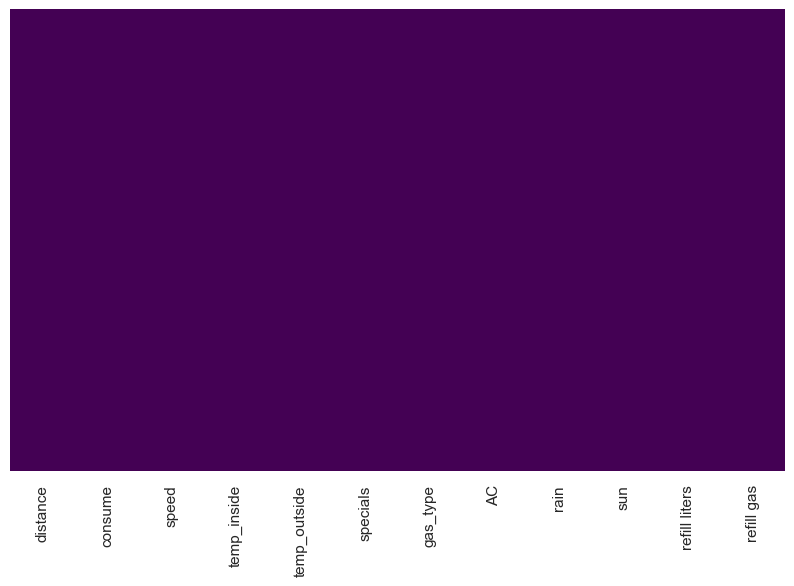

In [233]:
check_nan(df)

# Now we have to encode Categorical Features, Getdummies usually gives better results than labelencoder, we will go in that direction.

In [234]:
df=pd.get_dummies(df, columns=["specials", "gas_type", "refill gas"])

In [235]:
df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_ac,...,specials_others,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_notrefill
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,...,1,0,0,0,0,1,0,1,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0.0,0,...,1,0,0,0,0,0,1,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0.0,0,...,1,0,0,0,0,0,1,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1


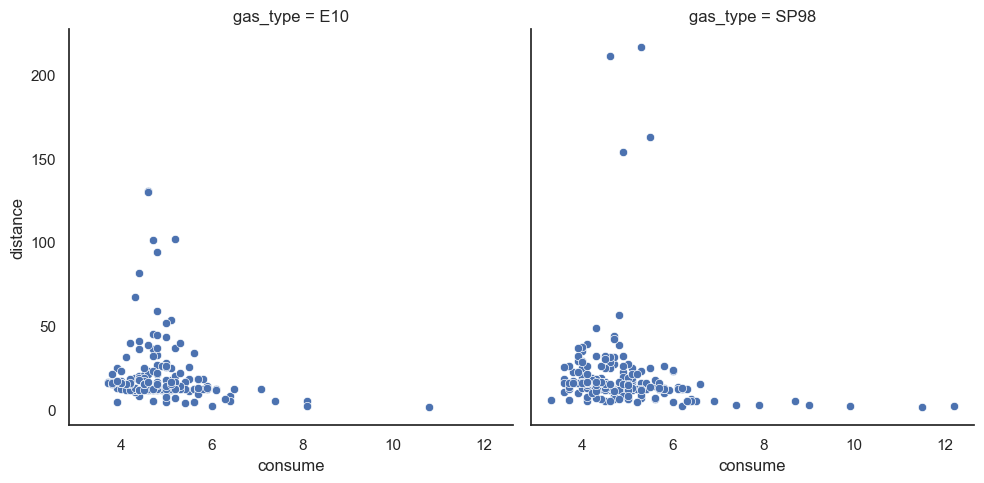

In [283]:
sns.relplot(data = df, x = "consume", y = "distance", col = "gas_type", kind = "scatter")
plt.show()

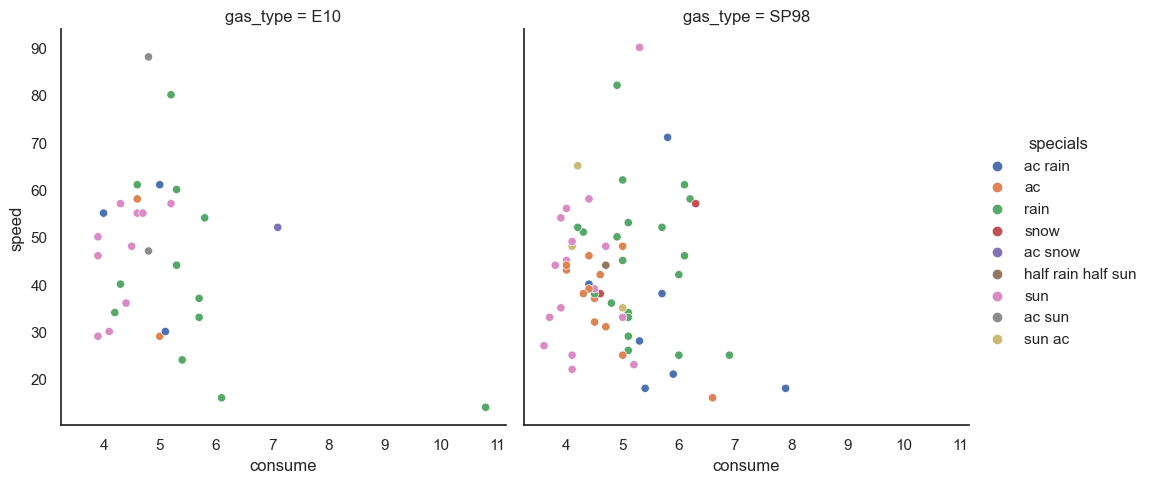

In [284]:
sns.relplot(data = df, x = "consume", y = "speed", hue = "specials", col = "gas_type", kind = "scatter")
plt.show()

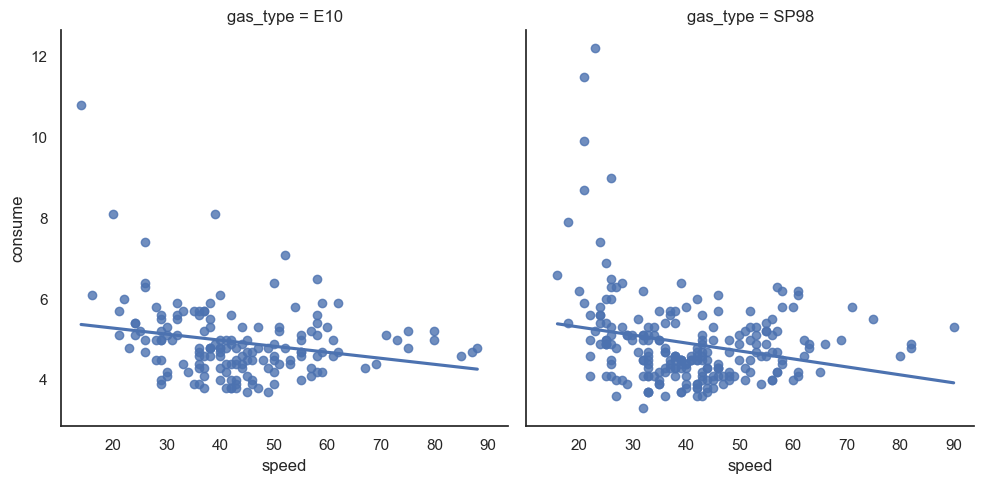

In [286]:
sns.lmplot(x="speed", y="consume", data=df, col = "gas_type",ci=None)

In [292]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0,NaN,NaN


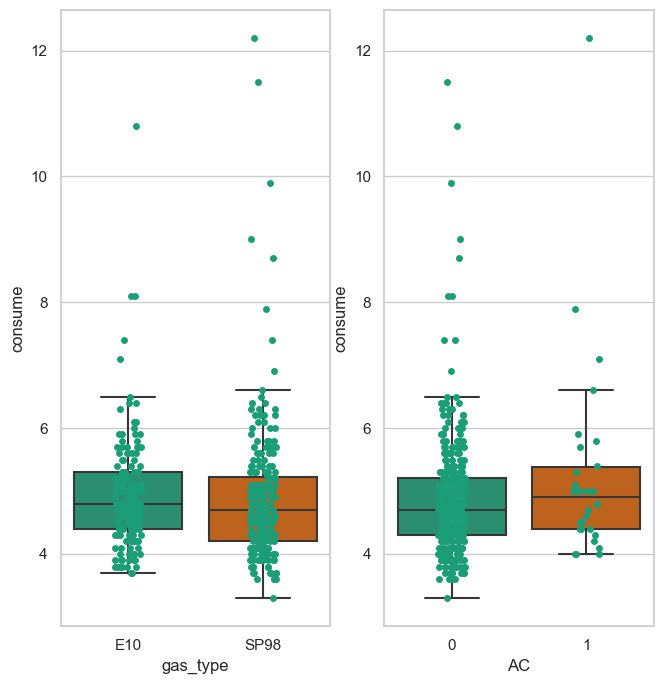

In [291]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Dark2')
fig = plt.figure(figsize=(16,8))

# gas_type
ax = fig.add_subplot(1,4,1)
sns.boxplot(x='gas_type', y='consume', data=df, showfliers=False, ax=ax)
sns.stripplot(x='gas_type', y='consume', data=df, jitter=True, ax=ax)
# AC
ax = fig.add_subplot(1,4,2)
sns.boxplot(x='AC', y='consume', data=df, showfliers=False, ax=ax)
sns.stripplot(x='AC', y='consume', data=df, jitter=True, ax=ax)


plt.show()

In [ ]:
## We leave the Outliers, they seem evenly distributed somewhat in both datasets

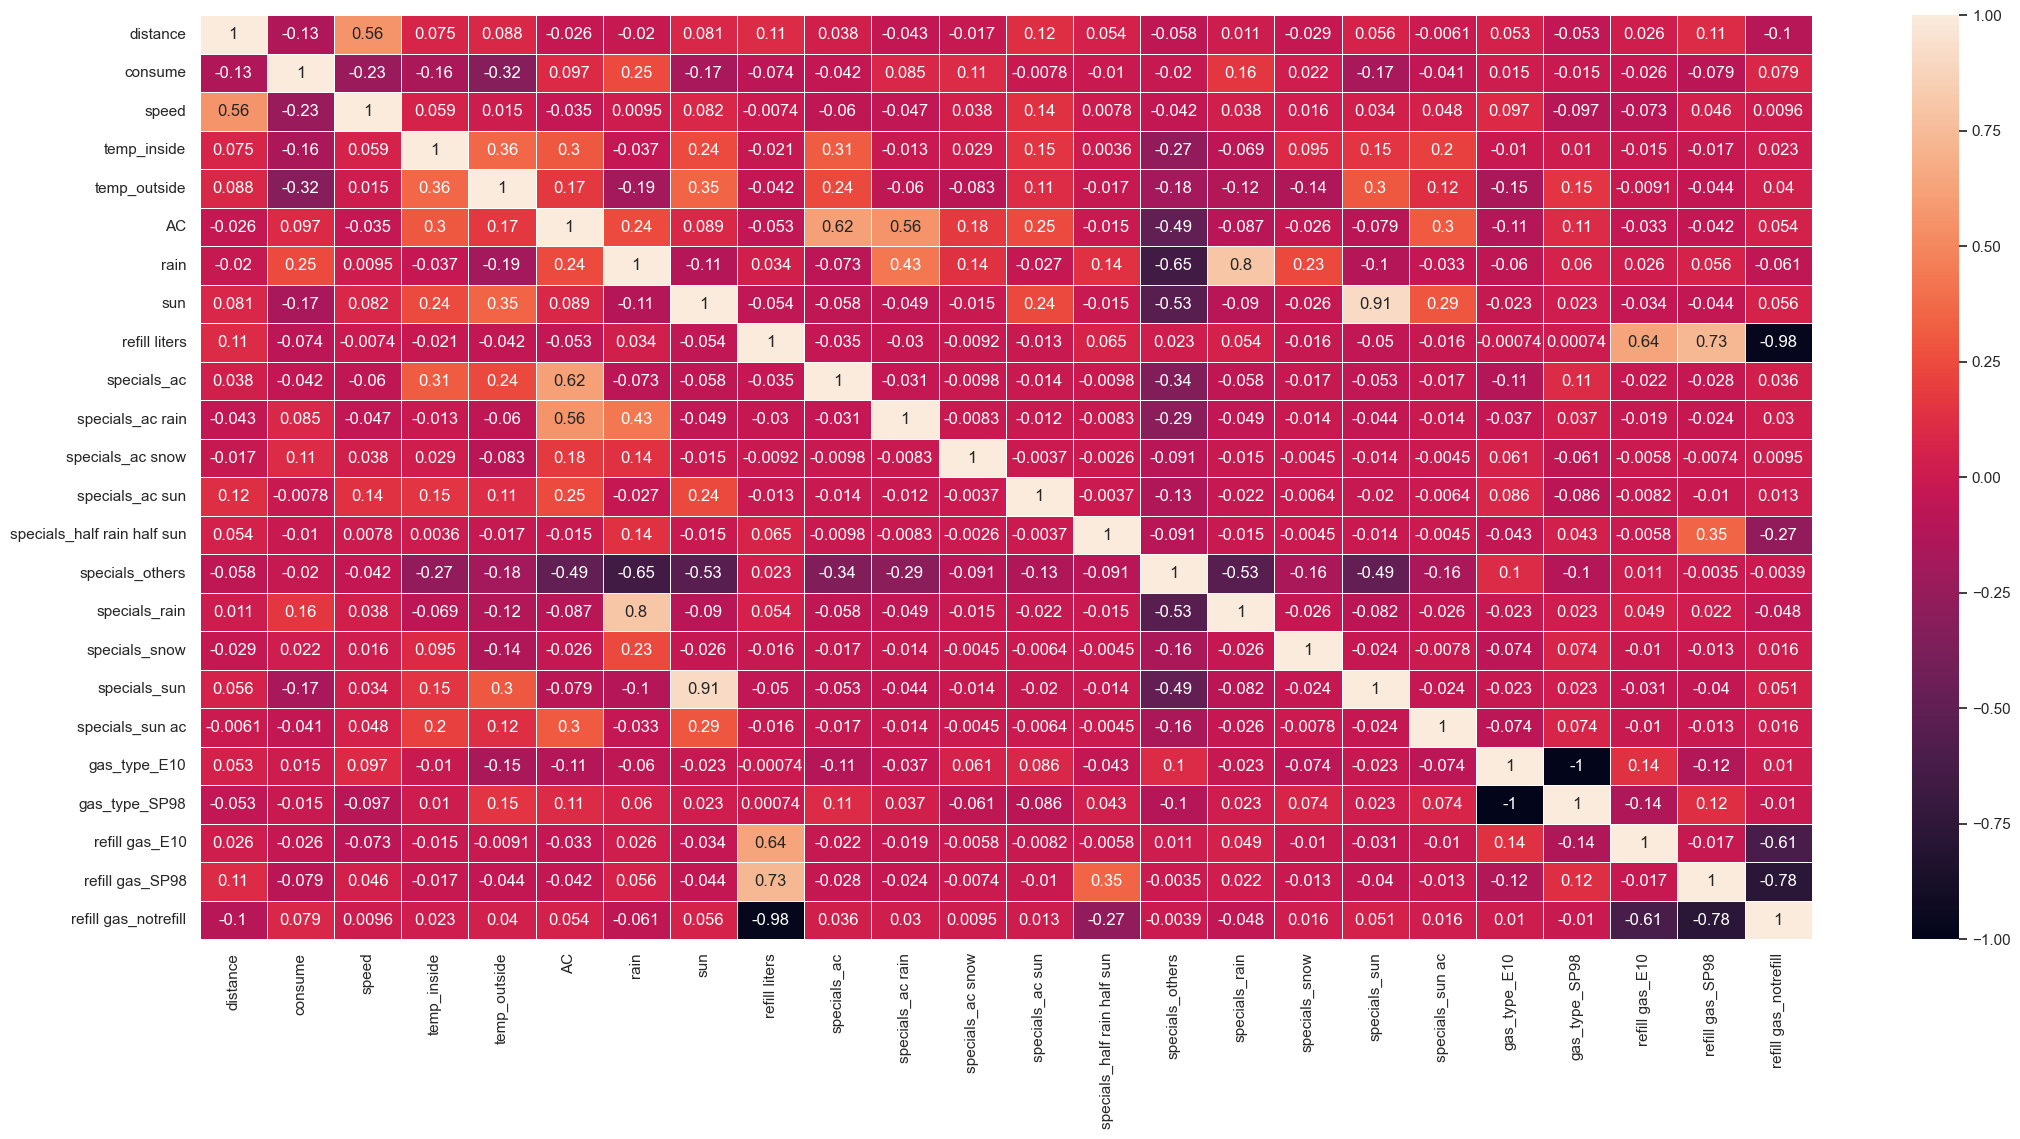

In [237]:
fig, ax = plt.subplots(figsize=(26,12))
sns.heatmap(df.corr(), linewidths=.5, annot=True, ax = ax)
plt.show()

# We are able to do a regression for the consumption type, of course asuming the data is accurate. My hypothesis reading up on relative consumption is that the distance covered and the average speed will play a much more significant role in predicting per 100 km consumption than any fuel type.

In [238]:
X = df.drop(['consume'], axis = 1)
y = df['consume']

In [239]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X,y)

In [240]:
X

array([[0.12430167, 0.15789474, 0.38461538, ..., 1.        , 0.        ,
        0.        ],
       [0.04981378, 0.21052632, 0.38461538, ..., 0.        , 0.        ,
        1.        ],
       [0.04608938, 0.31578947, 0.38461538, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.06843575, 0.40789474, 0.92307692, ..., 0.        , 0.        ,
        1.        ],
       [0.06564245, 0.36842105, 0.92307692, ..., 0.        , 0.        ,
        1.        ],
       [0.06238361, 0.14473684, 0.92307692, ..., 0.        , 0.        ,
        1.        ]])

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(310, 23) (78, 23) (310,) (78,)


In [242]:
def machine_learning():
    
    modelos = {'LinReg':LinReg(), 'Lasso':Lasso(), 'Ridge':Ridge(), 'Elastic':ElasticNet(), 'RFR':RFR(),'Cat':CatBoostRegressor(), 
               'SGD':SGDRegressor(),'XGBR':XGBR(),}
    
    nombres = ['LinReg', 'Lasso', 'Ridge', 'Elastic', 'RFR','Cat', 'SGD','XGBR']
    
    RMSE = []
    R2_test = []
    R2_train = []

    resumen_modelos = pd.DataFrame()

    for m in modelos:
            
        
            
        mod = modelos[m]
        mod.fit(X_train, y_train)

        y_pred=mod.predict(X_test)
        error = mse(y_test, y_pred, squared=False)

        y_pred = mod.predict(X_test)
        R2_ts = mod.score(X_test, y_test)
        y_pred = mod.predict(X_train) 
        R2_tr = mod.score(X_train, y_train)

        RMSE.append(int(error))
        R2_test.append(R2_ts)
        R2_train.append(R2_tr)

    resumen_modelos['Modelo'] = nombres
    resumen_modelos['RMSE'] = RMSE
    resumen_modelos['R2_test'] = R2_test
    resumen_modelos['R2_train'] = R2_train
    
    dict_errores = dict(zip(nombres, RMSE))
    best = list(dict_errores.keys())[list(dict_errores.values()).index(min(RMSE))] 
    
    modelo = modelos[best]
    
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    R2_test = modelo.score(X_test, y_test)
    y_pred = modelo.predict(X_train) 
    R2_train = modelo.score(X_train, y_train)
    
    error = round(min(RMSE),2)
    R2_train = round(R2_train, 4)
    R2_test = round(R2_test, 4)
    
    if R2_train > (1.15*R2_test):
        print(f'Best Model: {best}, RMSE = {error}, R2_train = {R2_train}, R2_test = {R2_test}, OVERFITING (modifica datos)')
    
    elif R2_train > R2_test:
        print(f'Best Model: {best}, RMSE = {error}, R2_train = {R2_train}, R2_test = {R2_test}, LO NORMAL')
    
    elif R2_train < R2_test:
        print(f'Best Model: {best}, RMSE = {error}, R2_train = {R2_train}, R2_test = {R2_test}, UNDERFITING (dame más datos)')
        
    return resumen_modelos

In [243]:
machine_learning()

Learning rate set to 0.034026
0:	learn: 0.8787728	total: 1.78ms	remaining: 1.78s
1:	learn: 0.8728402	total: 2.63ms	remaining: 1.31s
2:	learn: 0.8657847	total: 4.03ms	remaining: 1.34s
3:	learn: 0.8557753	total: 5.39ms	remaining: 1.34s
4:	learn: 0.8484814	total: 6.86ms	remaining: 1.36s
5:	learn: 0.8397642	total: 8.39ms	remaining: 1.39s
6:	learn: 0.8316456	total: 9.88ms	remaining: 1.4s
7:	learn: 0.8235468	total: 11.4ms	remaining: 1.41s
8:	learn: 0.8158800	total: 13.2ms	remaining: 1.45s
9:	learn: 0.8094026	total: 14.7ms	remaining: 1.45s
10:	learn: 0.8038889	total: 15.8ms	remaining: 1.42s
11:	learn: 0.7966446	total: 17.3ms	remaining: 1.42s
12:	learn: 0.7892854	total: 18.7ms	remaining: 1.42s
13:	learn: 0.7818334	total: 20.3ms	remaining: 1.43s
14:	learn: 0.7745571	total: 21.8ms	remaining: 1.43s
15:	learn: 0.7683038	total: 23.4ms	remaining: 1.44s
16:	learn: 0.7625801	total: 24.9ms	remaining: 1.44s
17:	learn: 0.7561583	total: 26.6ms	remaining: 1.45s
18:	learn: 0.7505596	total: 28.1ms	remaining:

217:	learn: 0.4122583	total: 359ms	remaining: 1.29s
218:	learn: 0.4120514	total: 361ms	remaining: 1.28s
219:	learn: 0.4115666	total: 362ms	remaining: 1.28s
220:	learn: 0.4110351	total: 364ms	remaining: 1.28s
221:	learn: 0.4100912	total: 366ms	remaining: 1.28s
222:	learn: 0.4097388	total: 367ms	remaining: 1.28s
223:	learn: 0.4088477	total: 370ms	remaining: 1.28s
224:	learn: 0.4076992	total: 371ms	remaining: 1.28s
225:	learn: 0.4074236	total: 373ms	remaining: 1.28s
226:	learn: 0.4063013	total: 375ms	remaining: 1.27s
227:	learn: 0.4044178	total: 376ms	remaining: 1.27s
228:	learn: 0.4043131	total: 378ms	remaining: 1.27s
229:	learn: 0.4036611	total: 380ms	remaining: 1.27s
230:	learn: 0.4019185	total: 381ms	remaining: 1.27s
231:	learn: 0.4011259	total: 384ms	remaining: 1.27s
232:	learn: 0.4000715	total: 386ms	remaining: 1.27s
233:	learn: 0.3986761	total: 387ms	remaining: 1.27s
234:	learn: 0.3978911	total: 389ms	remaining: 1.26s
235:	learn: 0.3960323	total: 390ms	remaining: 1.26s
236:	learn: 

442:	learn: 0.2829126	total: 721ms	remaining: 906ms
443:	learn: 0.2824015	total: 723ms	remaining: 906ms
444:	learn: 0.2820291	total: 725ms	remaining: 904ms
445:	learn: 0.2814702	total: 726ms	remaining: 902ms
446:	learn: 0.2810566	total: 728ms	remaining: 901ms
447:	learn: 0.2808381	total: 729ms	remaining: 899ms
448:	learn: 0.2804772	total: 731ms	remaining: 897ms
449:	learn: 0.2796734	total: 732ms	remaining: 895ms
450:	learn: 0.2792323	total: 734ms	remaining: 894ms
451:	learn: 0.2786686	total: 736ms	remaining: 892ms
452:	learn: 0.2785430	total: 738ms	remaining: 891ms
453:	learn: 0.2782171	total: 739ms	remaining: 889ms
454:	learn: 0.2781009	total: 741ms	remaining: 887ms
455:	learn: 0.2779935	total: 742ms	remaining: 885ms
456:	learn: 0.2779217	total: 743ms	remaining: 883ms
457:	learn: 0.2777792	total: 745ms	remaining: 881ms
458:	learn: 0.2776591	total: 746ms	remaining: 880ms
459:	learn: 0.2775249	total: 748ms	remaining: 878ms
460:	learn: 0.2770002	total: 750ms	remaining: 877ms
461:	learn: 

661:	learn: 0.2173720	total: 1.08s	remaining: 550ms
662:	learn: 0.2169241	total: 1.08s	remaining: 549ms
663:	learn: 0.2166885	total: 1.08s	remaining: 547ms
664:	learn: 0.2163674	total: 1.08s	remaining: 545ms
665:	learn: 0.2160235	total: 1.08s	remaining: 544ms
666:	learn: 0.2158406	total: 1.08s	remaining: 542ms
667:	learn: 0.2156033	total: 1.09s	remaining: 540ms
668:	learn: 0.2152206	total: 1.09s	remaining: 539ms
669:	learn: 0.2148930	total: 1.09s	remaining: 537ms
670:	learn: 0.2148573	total: 1.09s	remaining: 536ms
671:	learn: 0.2145086	total: 1.09s	remaining: 534ms
672:	learn: 0.2142558	total: 1.09s	remaining: 532ms
673:	learn: 0.2140696	total: 1.1s	remaining: 531ms
674:	learn: 0.2138655	total: 1.1s	remaining: 529ms
675:	learn: 0.2132097	total: 1.1s	remaining: 528ms
676:	learn: 0.2129210	total: 1.1s	remaining: 526ms
677:	learn: 0.2125500	total: 1.1s	remaining: 524ms
678:	learn: 0.2122542	total: 1.1s	remaining: 523ms
679:	learn: 0.2120710	total: 1.11s	remaining: 521ms
680:	learn: 0.2119

875:	learn: 0.1765510	total: 1.43s	remaining: 203ms
876:	learn: 0.1764987	total: 1.44s	remaining: 201ms
877:	learn: 0.1764457	total: 1.44s	remaining: 200ms
878:	learn: 0.1760680	total: 1.44s	remaining: 198ms
879:	learn: 0.1760061	total: 1.44s	remaining: 197ms
880:	learn: 0.1759838	total: 1.44s	remaining: 195ms
881:	learn: 0.1759622	total: 1.45s	remaining: 193ms
882:	learn: 0.1756650	total: 1.45s	remaining: 192ms
883:	learn: 0.1754969	total: 1.45s	remaining: 190ms
884:	learn: 0.1753245	total: 1.45s	remaining: 188ms
885:	learn: 0.1750277	total: 1.45s	remaining: 187ms
886:	learn: 0.1748405	total: 1.45s	remaining: 185ms
887:	learn: 0.1747362	total: 1.45s	remaining: 183ms
888:	learn: 0.1745490	total: 1.46s	remaining: 182ms
889:	learn: 0.1743260	total: 1.46s	remaining: 180ms
890:	learn: 0.1742047	total: 1.46s	remaining: 179ms
891:	learn: 0.1741376	total: 1.46s	remaining: 177ms
892:	learn: 0.1739286	total: 1.46s	remaining: 175ms
893:	learn: 0.1738595	total: 1.47s	remaining: 174ms
894:	learn: 

,Modelo,RMSE,R2_test,R2_train
0,LinReg,1,0.199795,2.202789e-01
1,Lasso,1,-0.020342,-3.751356e-09
2,Ridge,1,0.141209,2.120392e-01
3,Elastic,1,-0.020342,-3.751356e-09
4,RFR,0,0.607222,9.293522e-01
5,Cat,0,0.552618,9.680075e-01
6,SGD,1,0.090580,7.528285e-02
7,XGBR,1,0.445374,9.965463e-01


In [244]:
def ml1():
    
    models = {'RFR':{'MODEL':RFR(),'PARAM':{'n_estimators': [10, 50, 100, 150, 200, 500],'max_depth':             [1,5,10,15,20],'min_weight_fraction_leaf':[0.0,0.1,0.2]}},
              'XGB':{'MODEL':XGBR(),'PARAM':{'n_estimators': [10, 50, 100, 150, 200, 500],'max_depth': [1, 5,6, 10, 15, 20],'learning_rate':[0.001,0.002,0.01,0.05] }},
              'SVR':{'MODEL':SVR(),'PARAM':{'kernel':['rbf','poly','linear']}},
              #'CTR':{'MODEL':CTR(),'PARAM:':{'depth' : [6,8,10],'learning_rate' : [0.01, 0.05, 0.1],'iterations': [30, 50, 100],'subsample' : [0.5, 0.7, 1.0]}},
              #'GaussianNB':{'MODEL':GaussianNB(),'PARAM':{'var_smoothing':[1e-09]}},
              'Linear Regression':{'MODEL':LinReg(),'PARAM':{'n_jobs': [2, 5, 7, 10], 'fit_intercept': [True, False]}},
   
           'Lasso':{'MODEL':Lasso(),'PARAM':{'alpha':[0.3,0.5,0.7,0.9,1.0],'max_iter':[800,1000,1200]}},
              'LGBMR': {'MODEL':LGBMR(),'PARAM':{'boosting_type':['gbdt','dart'],'n_estimators':[10,50,100,150,200,500],}}}
    
    rmse = []
    name = []
    #b = []
    score = []
    dfmodels = pd.DataFrame()
    for m in models:
        x = models[m]["MODEL"]
        p = models[m]["PARAM"]
        y_pred=grid(x,p).predict(X_test)
        #best= grid(x,p).best_params_   
        #sco = grid(x,p).best_score_
        MSE = mse(y_test, y_pred, squared=False)
        #score.append(sco)
        #b.append(best)
        rmse.append(MSE)
        name.append(m)
    dfmodels['Modelo'] = name
    dfmodels['RMSE'] = rmse
    #dfmodels['Best_Parametres'] = b
    #dfmodels['bestsco'] = score                        
    dfmodels.sort_values("RMSE",ascending=True,inplace=True,ignore_index=True)
    print(f'model {dfmodels.Modelo[0]} rmse {dfmodels.RMSE[0]} ')
    return dfmodels

### The grid function has as an input a regression model, and its parametres, this function is nested inside the previous one and is responsible for optimizing hyperparametres with 5 cuts of cross validation and parallelizes with all available cores
def grid(modelo, param):
    
    g=GridSearchCV(modelo, # modelo de sklearn
                   param,  # dictio de parametros
                   cv=5,   # nº de cortes del cross-validation
                   return_train_score=True, # error en entrenamiento para checkear
                   n_jobs=-1  # usa todos los nucleos disponibles
                  )

    g.fit(X_train, y_train)
    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(g.best_params_))
    print('Modelo: {}'.format(modelo))
    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))

    return g.best_estimator_.fit(X_train, y_train)

In [245]:
ml1()

Acierto test: 0.60
Acierto train: 0.88
Mejores parametros: {'max_depth': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10}
Modelo: RandomForestRegressor()
Mejor acierto cv: 0.44
Acierto test: 0.65
Acierto train: 0.68
Mejores parametros: {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 500}
Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,

,Modelo,RMSE
0,XGB,0.863231
1,RFR,0.914395
2,LGBMR,0.980827
3,Linear Regression,1.301815
4,SVR,1.377463
5,Lasso,1.470013


In [246]:
# Using both functions we come to the conclusion that the XGBegressor is the most accurate predictive model

In [258]:
best = XGBR(learning_rate= 0.05, max_depth= 1, n_estimators= 500)

In [259]:
# Due to overfitting we attempt to Cross evaluate

In [260]:
cv = cross_val_score(best, X_train, y_train, cv=10)

In [261]:
cv

array([ 0.20195304,  0.65347697,  0.62334451,  0.70745749, -0.26891363,
        0.38101098,  0.31445394,  0.65701716,  0.02850657,  0.41364059])

In [262]:
cv.mean()

0.37119476119994044

In [263]:
best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=1, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [264]:
len(best.feature_importances_)

23

In [265]:
df1 = df.drop(columns="consume")

In [266]:
df1

,distance,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_ac,specials_ac rain,...,specials_others,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_notrefill
0,28.0,26,21.5,12,0,0,0,45.0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,12.0,30,21.5,13,0,0,0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,11.2,38,21.5,15,0,0,0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,12.9,36,21.5,14,0,0,0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,18.5,46,21.5,15,0,0,0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,1
384,16.1,38,25.0,31,1,0,0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
385,16.0,45,25.0,19,0,0,0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,1
386,15.4,42,25.0,31,1,0,0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1


<BarContainer object of 23 artists>

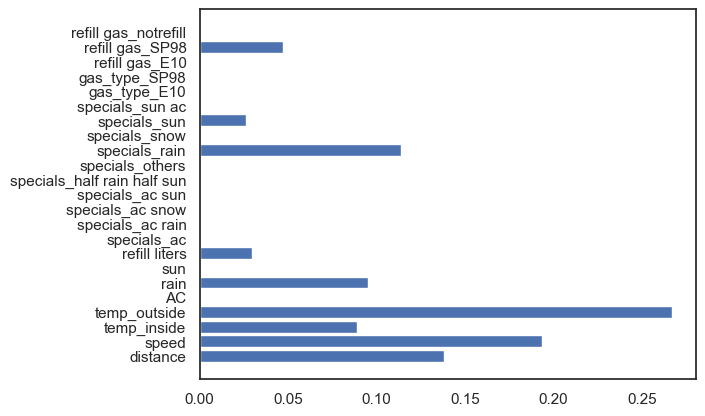

In [267]:
plt.barh(df1.columns, best.feature_importances_)


Text(0.5, 0, 'XGBoost feature importances')

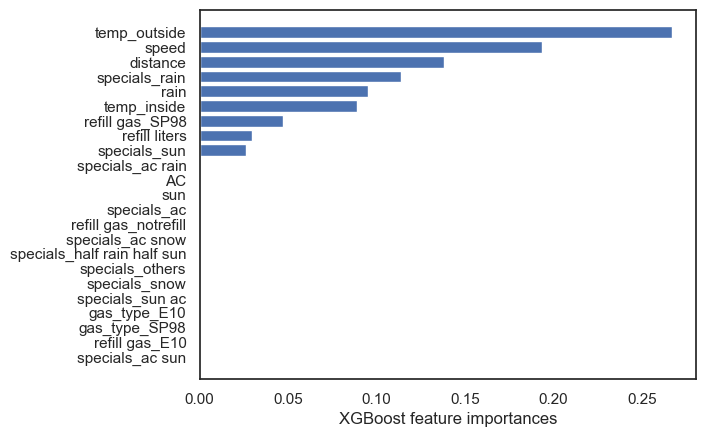

In [287]:
sorted_idx = best.feature_importances_.argsort()
plt.barh(df1.columns[sorted_idx], best.feature_importances_[sorted_idx])
plt.xlabel("XGBoost feature importances")

In [288]:
best.feature_importances_

array([0.138325  , 0.19327816, 0.08900415, 0.26710245, 0.        ,
       0.09526328, 0.        , 0.02957691, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11400694,
       0.        , 0.02632591, 0.        , 0.        , 0.        ,
       0.        , 0.04711729, 0.        ], dtype=float32)

In [272]:
from xgboost import plot_importance
from matplotlib import pyplot

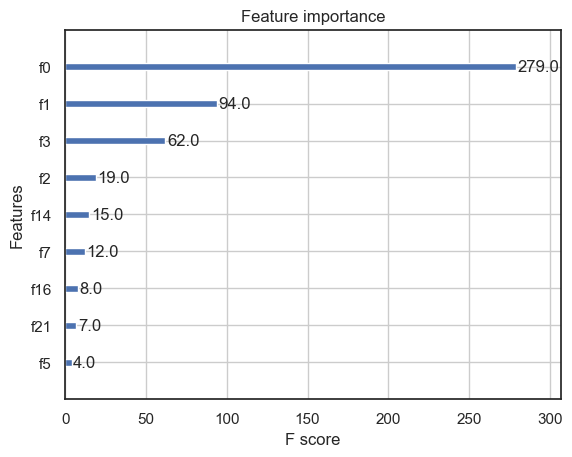

In [273]:
# plot feature importance
plot_importance(best)
pyplot.show()

# We get distance as the most important variable(Probably related to the type of road), then speed, then both outside and inside temperature(Heat usage)

# We have now analised the Importance of The different Variables to explain the per 100 km consumption, we could turn the problem around and create a classification analisis to see wether we can predict what Fuel type we are using by the consumption. 